In [1]:
import Spectrogram
from librosa.core import note_to_hz, cqt
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
# parameters
# nargin = 6
bins = 24 # bins per octave
fs = 22050 # sampling rate
n_bins = 77
# fmax = 61.73541266 # same as 1 octave
fmax = 880*2
fmin = note_to_hz('C0')
thresh= 0.0054

stride = 512

duration = 10
s = np.linspace(0,1*duration,fs*duration)
y_list = np.load('./y_list.npy')
x = np.sin(2*np.pi*50*s, dtype=np.float32) + np.sin(2*np.pi*110*s, dtype=np.float32) \
    + np.sin(2*np.pi*220*s, dtype=np.float32) + np.sin(2*np.pi*440*s, dtype=np.float32) \
    + np.sin(2*np.pi*880*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32) 
# x = y_list.astype(np.float32)[:10]

# Pytorch

In [3]:
CQT_layer = Spectrogram.CQT2010(fs, stride, fmin, fmax=None, n_bins=n_bins,
                        bins_per_octave=bins,center=True,
                        pad_mode='reflect')
cqt_torch0,_ = CQT_layer(torch.tensor(x))

0
1
2


/workspace/public_data/raven/MusicNet_Analysis/Tutorial/CQT/GPU_tool/Spectrogram.py:964: Warning: There are too many resampling
  warnings.warn('There are too many resampling',Warning)


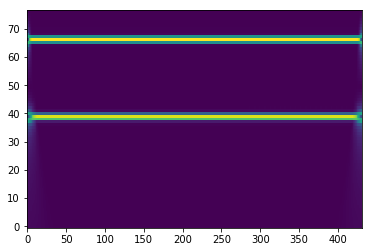

In [4]:
plt.imshow(cqt_torch0[0].numpy(),aspect='auto', origin='lower')
# plt.tick_params(labelsize=16)

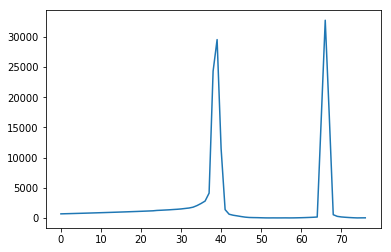

In [5]:
plt.plot(cqt_torch0[0].numpy()[:,10])

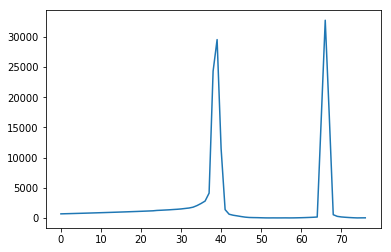

In [7]:
plt.plot(cqt_torch0[0].numpy()[:,10])

# Librosa

In [8]:
from librosa.core import cqt

In [9]:
cqt_lib = cqt(x, fs, stride, fmin, n_bins=n_bins,
              bins_per_octave=bins, norm=None)

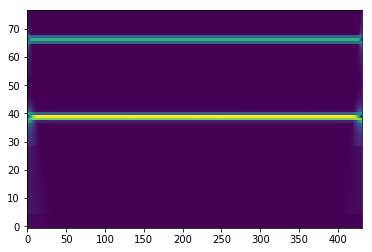

In [10]:
plt.imshow(abs(cqt_lib),aspect='auto', origin='lower')

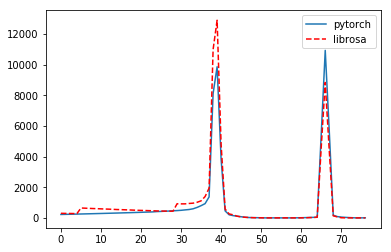

In [11]:
plt.plot(cqt_torch0[0].numpy()[:,10]/3)
plt.plot(abs(cqt_lib)[:,10], 'r--')
plt.legend(['pytorch', 'librosa'])